## Chi Squared Tests

In this notebook a chopped down version of the UFOs data set from unit 8 is explored. This data only includes data for UFO sightings in California and Texas and UFOs that have the five most prevelant shapes, circles, fireballs, orbs, lights, or triangles. Two hypotheses are tested. The first is as follows:

* H<sub>0</sub>: In CA (or TX) all shapes of UFOs are equally observed.
* H<sub>A</sub>: Some shapes are observed more often than others.

To test this hypothesis, one must compare the distribution of sittings to what would be expected if all shapes where equally likely. This involves doing a statistical test called the **chi square goodness of fit test**.

The second hypothesis tested is:

* H<sub>0</sub>: The relative frequency of the UFO shapes observed in CA is identical to what is observed in TX. Or stated another way, adjusting for any differences in the total amount of observations, the prevelance of the different shaped UFOs are the same in CA and TX.
* H<sub>A</sub>: The relative frequency of the UFO shapes observed in CA is different than what is observed in TX

To test this hypotheis, one must compare the observations of different shapes to what would be expected if the relative frequency of the different shapes was the same in TX and CA. This involves doing a statistical test called the **chi square test for uniformity or homogeneity**. 

Both of these hypothesis will be tested at the &alpha; = 0.05 significance level.

In [1]:
# Import some useful packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats # some useful stuff

In [2]:
# Import a chopped down version of the UFOs data set via github.
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/ufos_ca_tx.csv"
ufos = pd.read_csv(url) 
ufos.head()

,date,shape,location,state
0,7/9/16,Circle,Lakeside,CA
1,7/7/16,Circle,Laguna Hills,CA
2,7/6/16,Circle,Lincoln and Roseville,CA
3,7/4/16,Circle,Elk Grove,CA
4,7/4/16,Circle,Channel Islands Point Magu,CA


In [3]:
# There are five unique UFO shapes in this dataset.
ufos['shape'].unique()

array(['Circle ', 'Fireball ', 'Lights Only ', 'Orb/Sphere ', 'Triangle '],
      dtype=object)

In [4]:
# There is data for CA and TX in this dataset. 
ufos['state'].unique()

array(['CA', 'TX'], dtype=object)

### Contingency Tables Summarize the Number of Observations of Different Categorical Values (Columns) for Each Group in the Data (Rows)

To test the hypotheses above, we must figure out how many times each categorical value (shape) occurs in the data set for each group (state). We can easily calculate these counts by using a built in pandas method called crosstab. Contingency tables are sometimes called crosstab tables.

In [5]:
ufo_obs = pd.crosstab(index=ufos['state'], columns = ufos['shape'])
ufo_obs

shape,Circle,Fireball,Lights Only,Orb/Sphere,Triangle
state,,,,,
CA,35,50,92,32,25
TX,9,6,26,10,10


In [6]:
# Let's pull out the list of shapes, the CA row, and the TX row into separate
# variables to make them easier to work with.
shapes = ufo_obs.columns
ca_obs = ufo_obs.loc['CA']
tx_obs = ufo_obs.loc['TX']

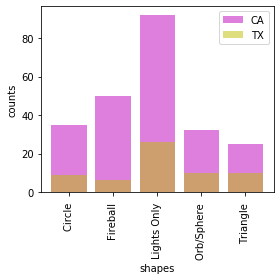

In [7]:
# Let's look at the data on one bar plot.
plt.figure(figsize=(4,4))
plt.bar(shapes, ca_obs, color='m', alpha=0.5)
plt.bar(shapes, tx_obs, color='y', alpha=0.5)
plt.ylabel('counts')
plt.xlabel('shapes')
plt.xticks(rotation=90)
plt.legend(['CA', 'TX'])
plt.tight_layout() # helps with formating when saving the figure
plt.savefig('ufos1.png', dpi=300)
plt.show()

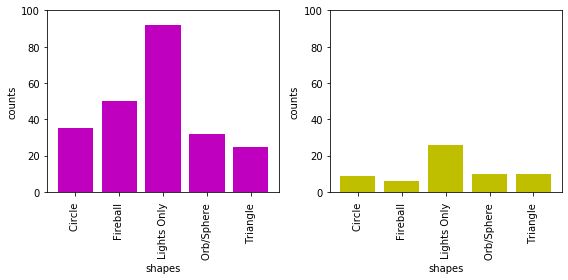

In [8]:
# Let's look at the data side by side (subplots).
plt.figure(figsize=(8,4));
plt.subplot(1,2,1)
plt.bar(shapes, ca_obs, color='m')
plt.xlabel('shapes')
plt.xticks(rotation=90)
plt.ylabel('counts')
plt.ylim([0, 100])
plt.subplot(1,2,2)
plt.bar(shapes, tx_obs, color='y')
plt.xlabel('shapes')
plt.xticks(rotation=90)
plt.ylabel('counts')
plt.ylim([0, 100])
plt.tight_layout()
plt.savefig('ufos2.png', dpi=300)
plt.show()


## Hypothesis One

* H<sub>0</sub>: In CA all shapes of UFOs are equally observed.
* H<sub>A</sub>: Some shapes are observed more often than others.

The test statistic for this hypothesis is chi squared:

&chi;<sup>2</sup> = SUM((n_expected - n_observed)^2/n_expected) 

where the sum is over all categorical values (here the different shapes).

The critical value for &chi;<sup>2</sup> above which we reject the null hypothesis depends on the degrees of freedom in our dataset. The degrees of freedom is always one less than then number of categorical values in our data (dof = k-1, where k is the number of columns in the contingency table).

For our data that means dof = 5 - 1 = 4. We can look up the X<sup>2</sup>-critical value for dof = 4 and &alpha; = 0.05 in a table.

[chi-square table](https://www.medcalc.org/manual/chi-square-table.php)

X<sup>2</sup>-critical = 9.488

In [9]:
# Now let's calculate chi squared. First, we need to calculate
# what we would expect to see in the CA data if all shapes were equally
# prevalent. This is the total number of observation divided by the number
# of unique shapes in the data set.
ca_exp = sum(ca_obs)/5
ca_exp

46.8

In [10]:
# This value is how many of each shape we would expect to see so make an
# array that matches the shape of ca_obs and has this value repeated.
ca_exp = ca_exp * np.ones(5)
ca_exp

array([46.8, 46.8, 46.8, 46.8, 46.8])

In [11]:
# calculated the differences between the observation and the expected
diff = ca_exp - ca_obs
diff

shape
Circle          11.8
Fireball        -3.2
Lights Only    -45.2
Orb/Sphere      14.8
Triangle        21.8
Name: CA, dtype: float64

In [12]:
# square these differences
diff_sq = diff**2
diff_sq

shape
Circle           139.24
Fireball          10.24
Lights Only     2043.04
Orb/Sphere       219.04
Triangle         475.24
Name: CA, dtype: float64

In [13]:
# divide each squared difference by the number of expected observations
diff_sq_norm = diff_sq/ca_exp
diff_sq_norm

shape
Circle           2.975214
Fireball         0.218803
Lights Only     43.654701
Orb/Sphere       4.680342
Triangle        10.154701
Name: CA, dtype: float64

In [14]:
# sum these all up to find chi squared
chi_squared = sum(diff_sq_norm)
print('chi squared = ', chi_squared)

chi squared =  61.68376068376068


Chi squared is much larger than the critical value so we REJECT the null hypothesis and accept the alternative. Different shaped UFOs are observed with different frequencies. In the next cell a method that is part of the stats package is used to do all of the work for us and compute an exact p-value as well. Neat!

In [15]:
chi2, p = stats.chisquare(ca_obs)
print('chi squared = ', chi2, ', p = ', p)

chi squared =  61.68376068376068 , p =  1.2839267935127693e-12


In [16]:
# What about Texas? Reject the null here as well. 
chi2, p = stats.chisquare(tx_obs)
print('chi squared = ', chi2, ', p = ', p)

chi squared =  20.393442622950822 , p =  0.0004175524820444574


## Hypothesis Two

* H<sub>0</sub>: The frequency of the various UFO shapes observed in CA is identical to what is observed in TX. 
* H<sub>A</sub>: The frequency of the various UFO shapes observed in CA is different than what is observed in TX

To test this hypothesis we will use the same contingency table but now we aggregate all of the data in each category (columns, shapes) in order to determine the expected values assuming the frequency of all categories is the same in both groups (rows, states). In other words, we assume the distribution of the varous shapes does not depend on the state and the expected value of the element in the r<sup>th</sup> row and the c<sup>th</sup> column is

expected<sub>r,c</sub> = n<sub>r</sub>n<sub>c</sub>/n, 

where n<sub>r</sub> is the total number of observations in group r (row r sum), n<sub>c</sub> is the total number of observations of category value c (column c sum), and n is the total number of obsvations in all groups and columns.

After the expected values are calculated, the chi-squared statistic is found using the same formula as above but summing over all columns and rows.

expected<sub>rc</sub> = n<sub>r</sub>n<sub>c</sub>/n, 

where n<sub>r</sub> is the total number of observations in sub-group r and n<sub>c</sub> is the total number of observations of category value c.

The critical vlaue of &chi;<sup>2</sup> is found in the [same table as before](https://www.medcalc.org/manual/chi-square-table.php) but now the degrees of freedom depend on the number of rows and columns,

dof = (r-1)(c-1).

For the contingency table in this case, dof = (2-1)(5-1) = 4 and 

X<sup>2</sup>-critical = 9.488

Let's proceed.

In [17]:
# find the column sums by adding 
n_c = ca_obs + tx_obs
n_c

shape
Circle           44
Fireball         56
Lights Only     118
Orb/Sphere       42
Triangle         35
dtype: int64

In [18]:
# find the total of all observations
n = sum(n_c)
n

295

In [19]:
# find the row sums (here they are n_ca and n_tx for clarity)
n_ca = sum(ca_obs)
n_tx = sum(tx_obs)
print('n_ca = ', n_ca, ', n_tx = ', n_tx)

n_ca =  234 , n_tx =  61


In [20]:
# calculate the expected number of observations for the CA data
ca_exp = n_c*n_ca/n
ca_exp

shape
Circle          34.901695
Fireball        44.420339
Lights Only     93.600000
Orb/Sphere      33.315254
Triangle        27.762712
dtype: float64

In [21]:
# and for the TX data
tx_exp = n_c*n_tx/n
tx_exp

shape
Circle           9.098305
Fireball        11.579661
Lights Only     24.400000
Orb/Sphere       8.684746
Triangle         7.237288
dtype: float64

In [22]:
# finally calculate chi squared
chi2 = sum((ca_exp - ca_counts)**2/ca_exp + (tx_exp - tx_counts)**2/tx_exp)
print('chi squared = ', chi2)

NameError: name 'ca_counts' is not defined

&chi;<sup>2</sup> is not larger than the critical value so we must ACCEPT the null hypotehsis and reject the alternative. In other words, there is no difference between the frequency the different shaped UFOs are observed in CA and TX, statistically speaking. In the next cell a method in the stats package is used to do all of the hard work for us. We simply feed it the contingency table.

In [ ]:
chi2, p, dof, exp = stats.chi2_contingency(ufo_obs)
print('chi squared = ', chi2, ', p = ', p, ', dof = ', dof)
exp